<a href="https://colab.research.google.com/github/Marceline37/securit-/blob/main/Analyses_des_diff%C3%A9rentes_attaques_internet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyses des différentes attaques DDoS** 

---
*-	Apache2*
*-	Back*
*-	Land*
*-	Neptune*
*-	Mailbomb*
*-	Pod*
*-	Srocesstable*
*-	Smurf*
*-	Teardrop*
*-	Udpstorm*
*-	Worm*








# 1 Librairies

In [129]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
import matplotlib.gridspec as gridspec 

# 2 Explorations et analyses des données

In [130]:
test = 'https://raw.githubusercontent.com/Marceline37/securit-/main/KDDTest%2B.txt'
train ='https://raw.githubusercontent.com/Marceline37/securit-/main/KDDTrain%2B.txt'
train_20p = 'https://raw.githubusercontent.com/Marceline37/securit-/main/KDDTrain%2B_20Percent.txt'


df = pd.read_csv(train)
test_df = pd.read_csv(test)

In [131]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns
test_df.columns = columns

In [132]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


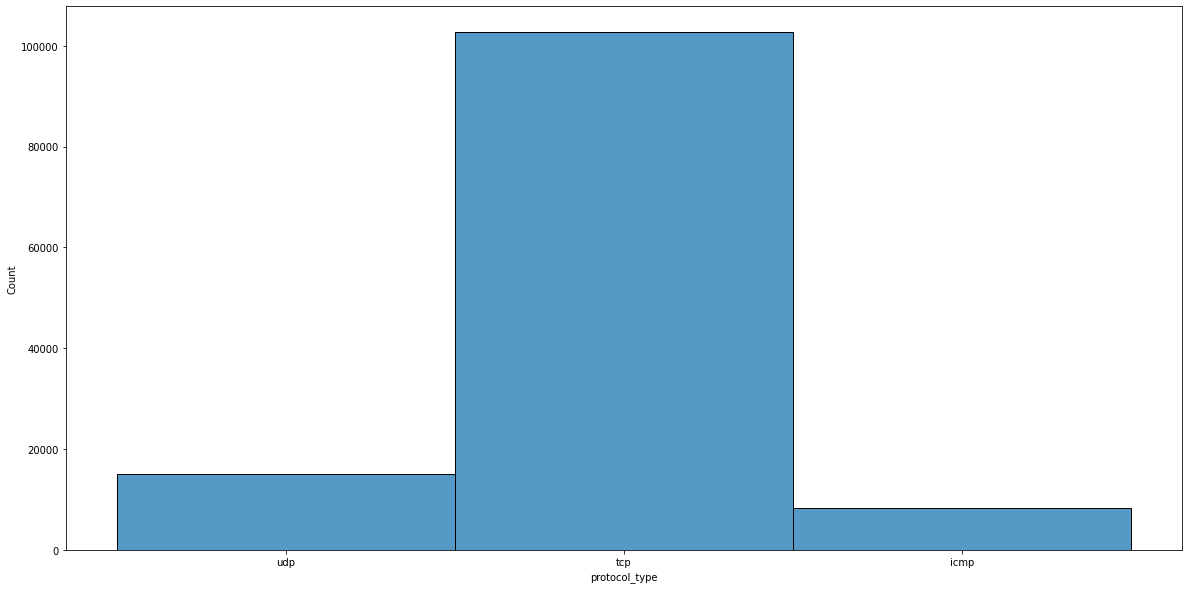

In [133]:
# Analyse de la colonne 'protocol_type'
plt.figure(figsize=(20, 10))
sns.histplot(data=df.protocol_type, palette="Set2")

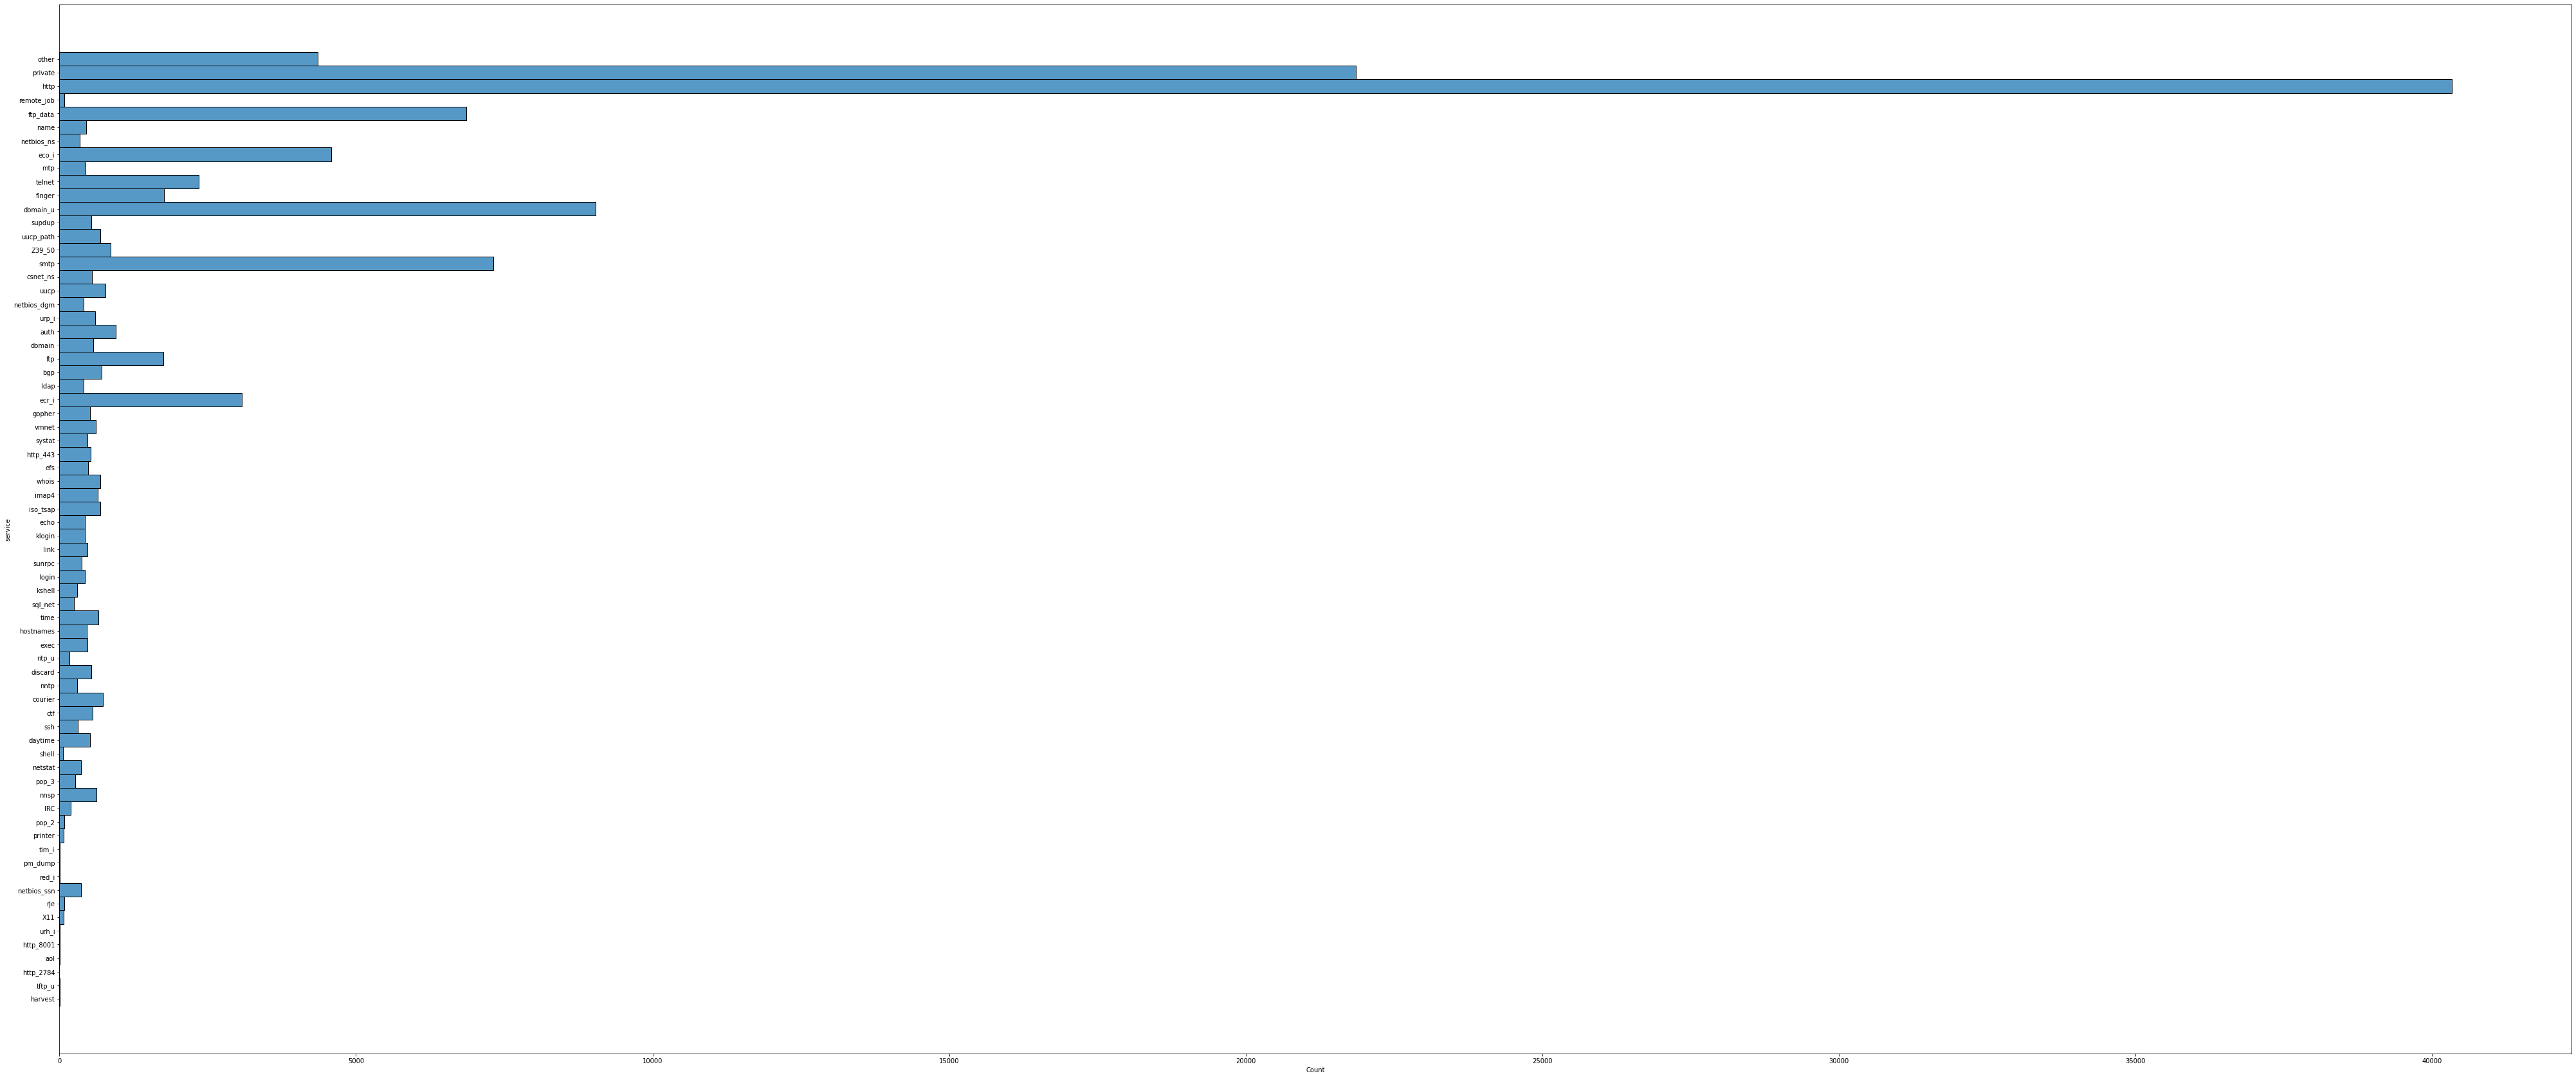

In [134]:
# Analyse de la colonne 'service'
plt.figure(figsize=(70, 30))
sns.histplot(data=df,y="service", palette="Set2")

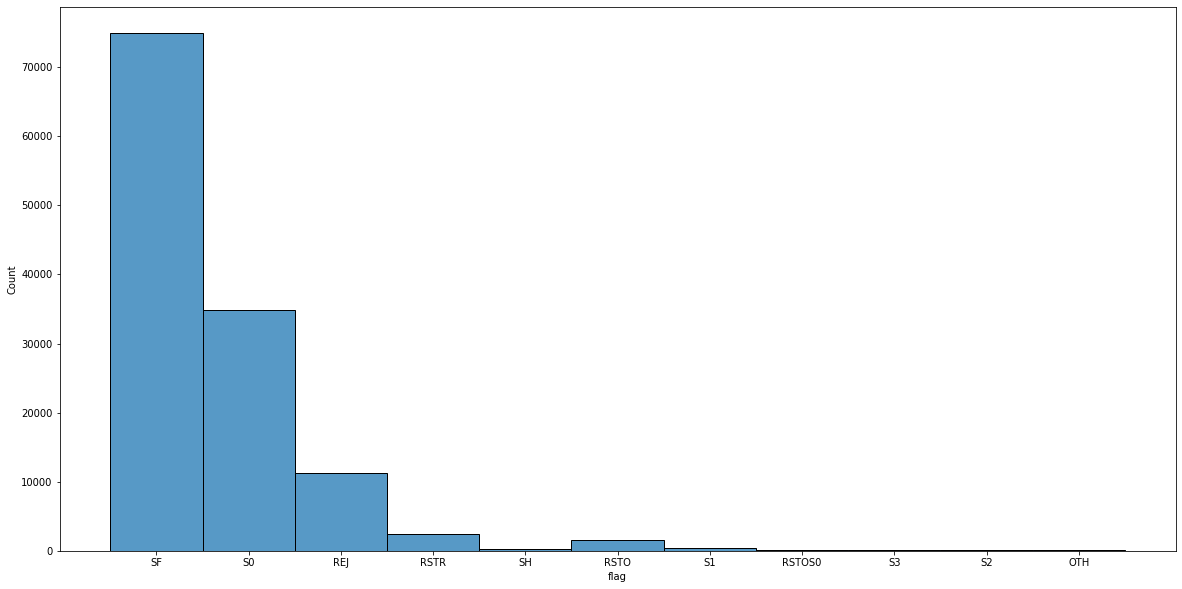

In [135]:
# Analyse de la colonne 'flag'
plt.figure(figsize=(20, 10))
sns.histplot(data=df.flag, palette="Set2")

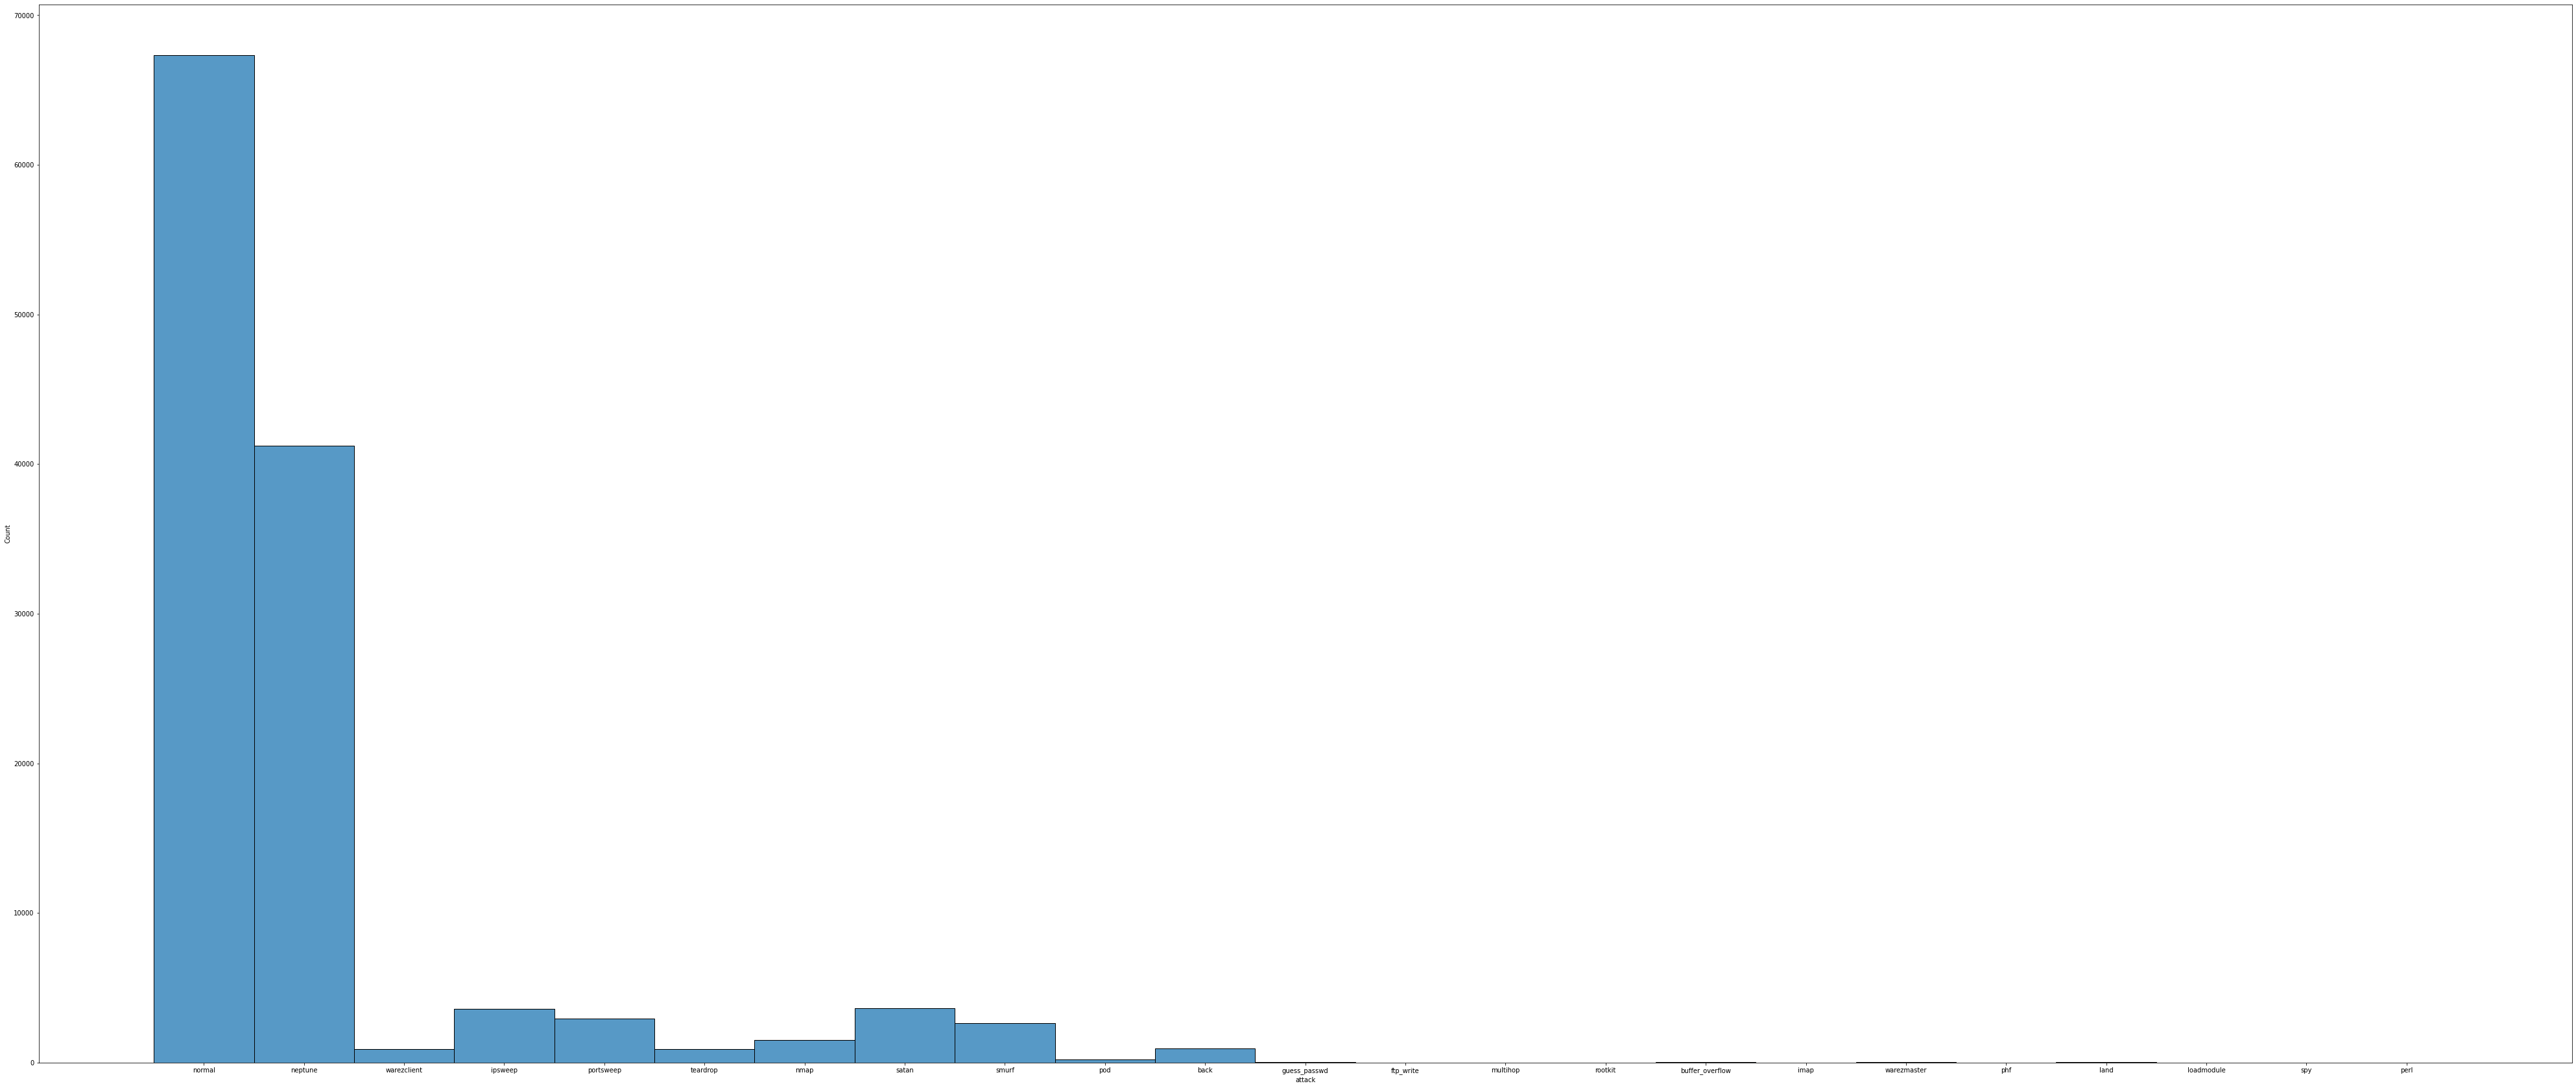

In [136]:
plt.figure(figsize=(70, 30))
sns.histplot(data=df.attack, palette="Set2")

In [137]:
# J'affiche les valeurs des attributs dans notre ensemble de données, telles que min, max, écart type
df.describe() 

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [138]:
# Les informations du jeu du données train
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [139]:
# Les informations du jeux de données test
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [140]:
test_df.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

*Il y a 4 variables catégorielles dans notre jeux de données et aucune valeurs nulles.*

,Missing Records,Percentage (%)
duration,0,0.0
protocol_type,0,0.0
service,0,0.0
flag,0,0.0
src_bytes,0,0.0
dst_bytes,0,0.0
land,0,0.0
wrong_fragment,0,0.0
urgent,0,0.0
hot,0,0.0


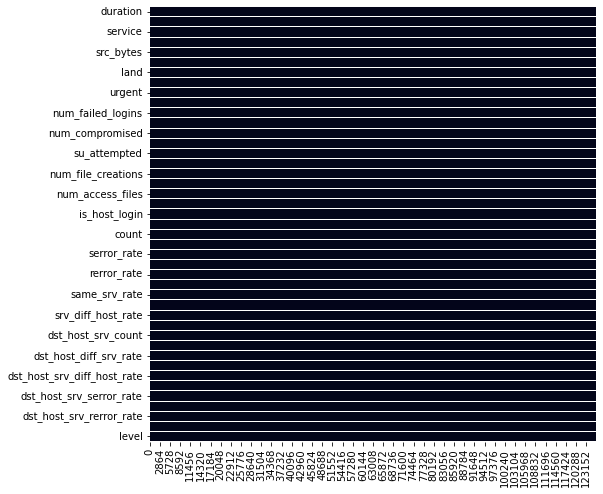

In [141]:
plt.figure(figsize=(8,8))
sns.heatmap(pd.isnull(df.T), linecolor='blue', cbar=False)

pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/len(df)], 
              axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})

In [142]:
def plot_hist(df, cols, title):
    grid = gridspec.GridSpec(10, 2, wspace=0.5, hspace=0.5) 
    fig = plt.figure(figsize=(15,25)) 
    
    for n, col in enumerate(df[cols]):         
        ax = plt.subplot(grid[n]) 
        ax.hist(df[col], bins=20) 
        ax.set_title(f'{col} distribution', fontsize=15) 
    
    fig.suptitle(title, fontsize=20)
    grid.tight_layout(fig, rect=[0, 0, 1, 0.97])
    plt.show()

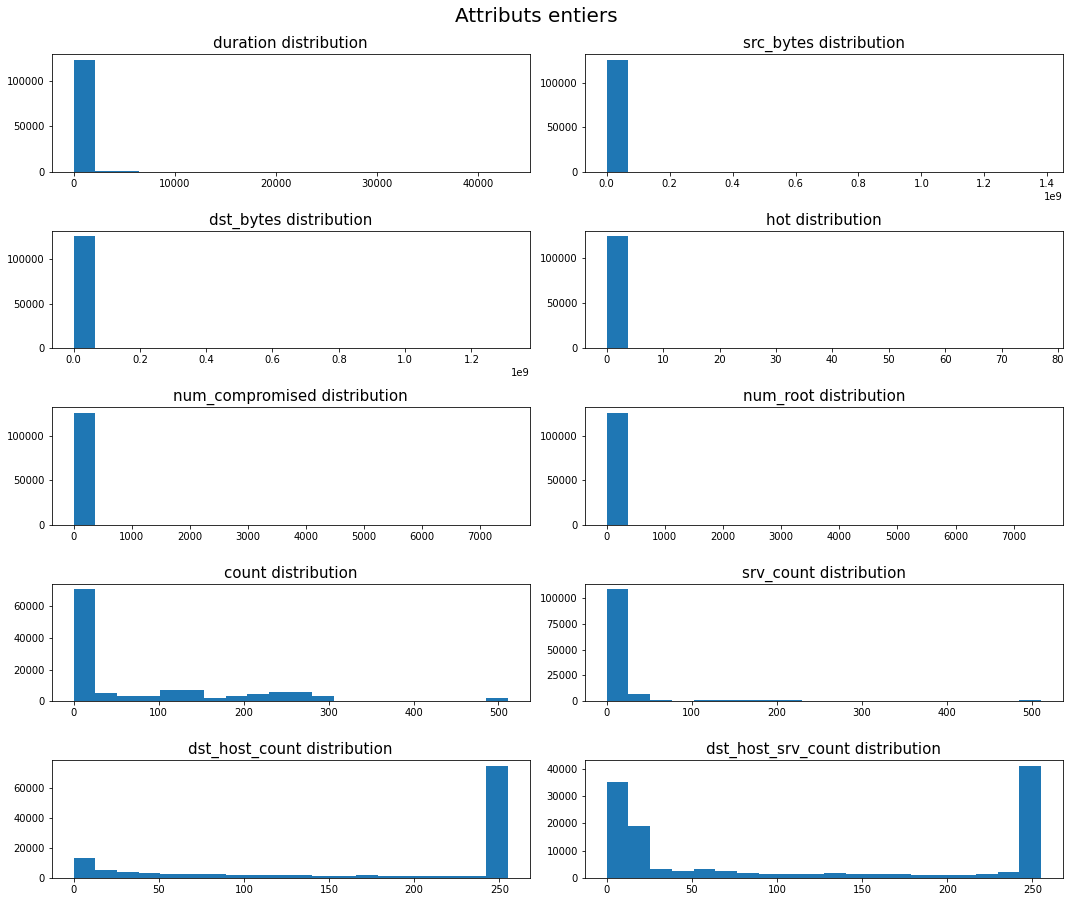

In [143]:
hist_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']
    
plot_hist(df, hist_cols, 'Attributs entiers')

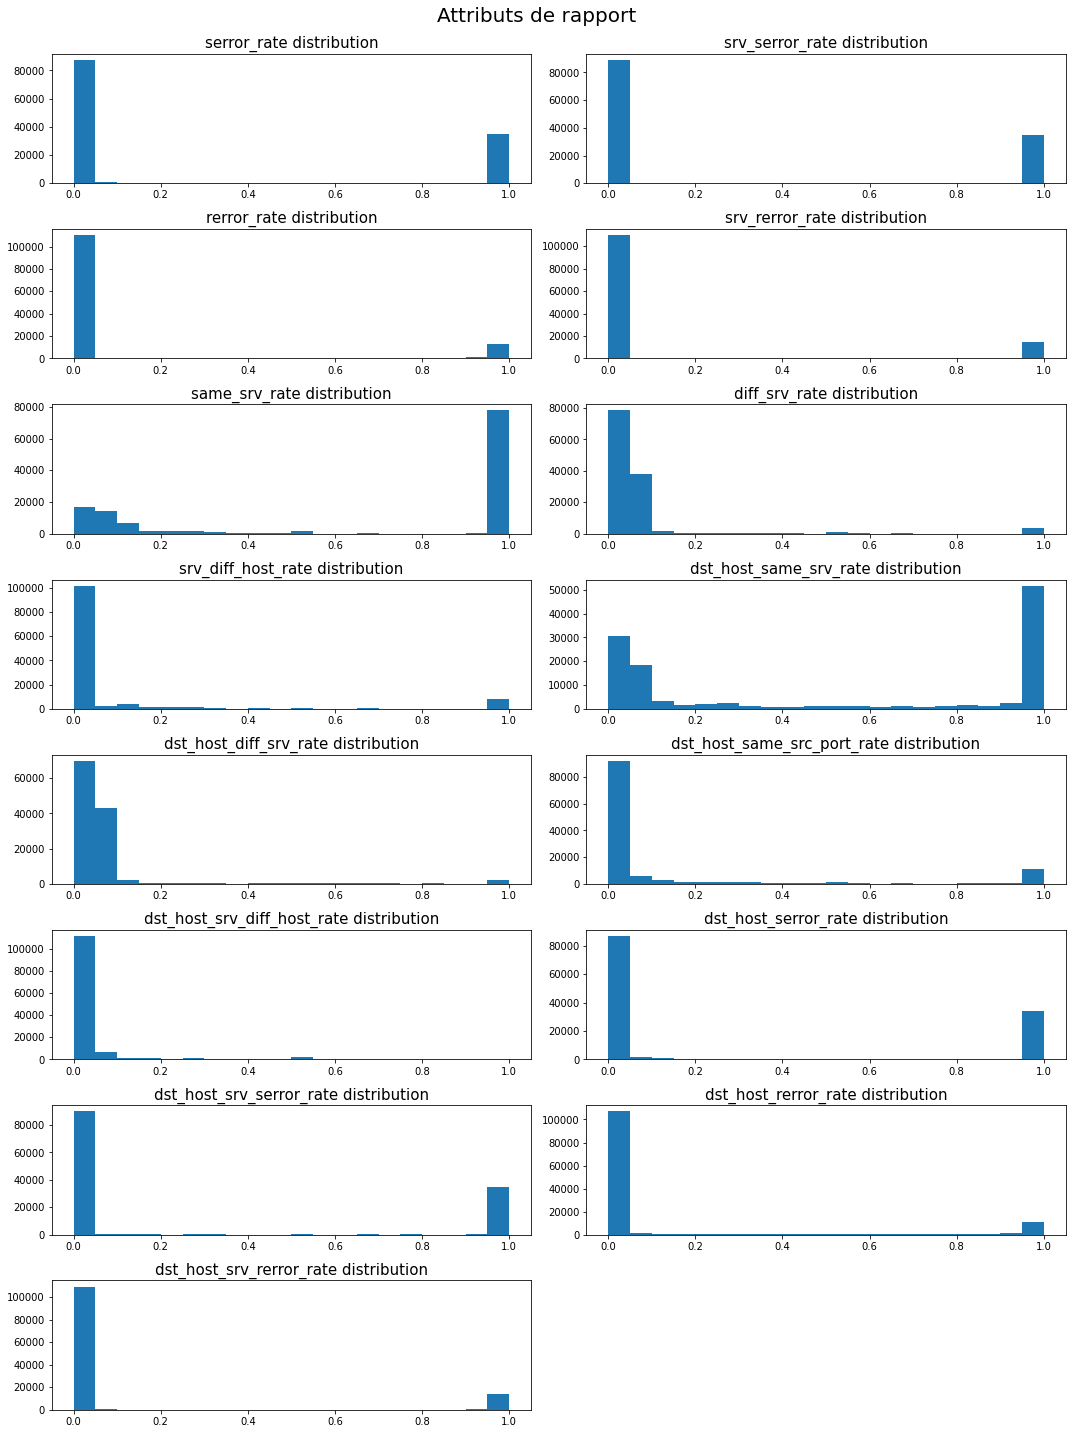

In [144]:
rate_cols = [ 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

plot_hist(df, rate_cols, 'Attributs de rapport')

*J'ai visualisé les distributions des entités dans notre jeu de données.*

In [145]:
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

df['attack_state'] = is_attack
test_df['attack_state'] = test_attack

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


*Voici la  colonne d'attaque catégorique numériquement en créant la colonne attak_state, où j'affiche les états d'attaques comme 1 et les états de non-attaques comme 0. Ainsi, je peux voir combien de données d'attaque et des données normales j'ai.*

In [146]:
(df.attack_state == 1).sum()/len(df)

0.4654208871812784

*Il y a environ 46 % d'attaques dans notre jeu de données Train.*

In [147]:
(test_df.attack_state == 1).sum()/len(df)

0.10186390626488426

*Il y a environ 10% d'attaques dans notre jeu de données Test.*

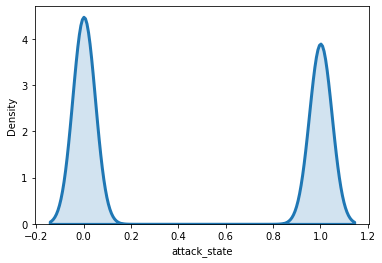

In [148]:
sns.kdeplot(
   data=df, x="attack_state",
   fill=True, common_norm=False, palette="crest",
   alpha=.2, linewidth=3,
)

In [149]:
# Je définie les nombres de situation d'attaques et ceux sans attaques 
nbre_attack = (df.attack_state == 1).sum()
nbre_sans_attack= (df.attack_state == 0).sum()
myData = [nbre_attack , nbre_sans_attack]

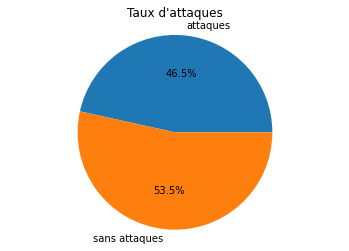

In [153]:
my_labels = 'attaques','sans attaques'
plt.pie(myData,labels=my_labels,autopct='%1.1f%%')
plt.title("Taux d'attaques")
plt.axis('equal')
plt.show()

*Création des classes dans lesquelles les attaques contiennent des types de sous-attaques.*

*Dans l'ensemble de données, il y a 6 types de sous-attaques que je collecterais dans la classe d'attaque DoS/DDoS.*

In [98]:
# On définie les différentes attaques DDoS/DoS 
DoS_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']

In [99]:
def class_attack(attack):
  if attack in DoS_attacks:
    attack_type = 1
  else : 
    attack_type = 0
  return attack_type  

*Création de la colonne 'attack_class' que j'ajoute dans le jeux de données.*

*Sous cette colonne se trouve les équivalents numériques des classes des attaques.*

In [100]:
attack_class = df.attack.apply(class_attack)
df['attack_class'] = attack_class

test_attack_class = test_df.attack.apply(class_attack)
test_df['attack_class'] = test_attack_class

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1,1


*Exploration de nouveau des données*

In [101]:
Normal = (df.attack_class == 0).sum()/len(df)
print('Normal = ' , Normal)
DoSDDoS = (df.attack_class == 1).sum()/len(df)
print('DoS/DDoS = ' , DoSDDoS)

Normal =  0.6354189819959991
DoS/DDoS =  0.3645810180040009


In [102]:
# Observation de la répartition des types d'attaques au sein des classes d'attaques.
attack_vs_class = pd.crosstab(df.attack_class, df.attack)
attack_vs_class

attack,back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,...,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster
attack_class,,,,,,,,,,,,,,,,,,,,,
0,0,30,8,53,11,3599,0,9,7,0,...,4,0,2931,10,3633,0,2,0,890,20
1,956,0,0,0,0,0,18,0,0,41214,...,0,201,0,0,0,2646,0,892,0,0


In [103]:
attack_vs_DDoS = pd.crosstab(df.attack_class == 1, df.attack)
attack_vs_DDoS

attack,back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,...,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster
attack_class,,,,,,,,,,,,,,,,,,,,,
False,0,30,8,53,11,3599,0,9,7,0,...,4,0,2931,10,3633,0,2,0,890,20
True,956,0,0,0,0,0,18,0,0,41214,...,0,201,0,0,0,2646,0,892,0,0


In [104]:
#Visualisons les distributions.

def bake_pies(data_list,labels):
    list_length = len(data_list)
    
    # Configuration pour mapper les couleurs
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
    # Construction des subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
    
    # Parcourir les ensembles de données et créer les graphiques
    for count, data_set in enumerate(data_list): 
        
        # Mise à jour notre palette de couleurs avec de nouvelles valeurs
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        # Construction des wedges
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        # Mise en place de la légende
        axs[count].legend(wedges, data_set.index,
                           title="Situation",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # Définission du titre
        axs[count].set_title(labels[count])
        
    return axs 

*Dans cette étude, je peux distinguer les types d'attaques qui sont inclus dans les attaques DDoS que je vais étudier.*

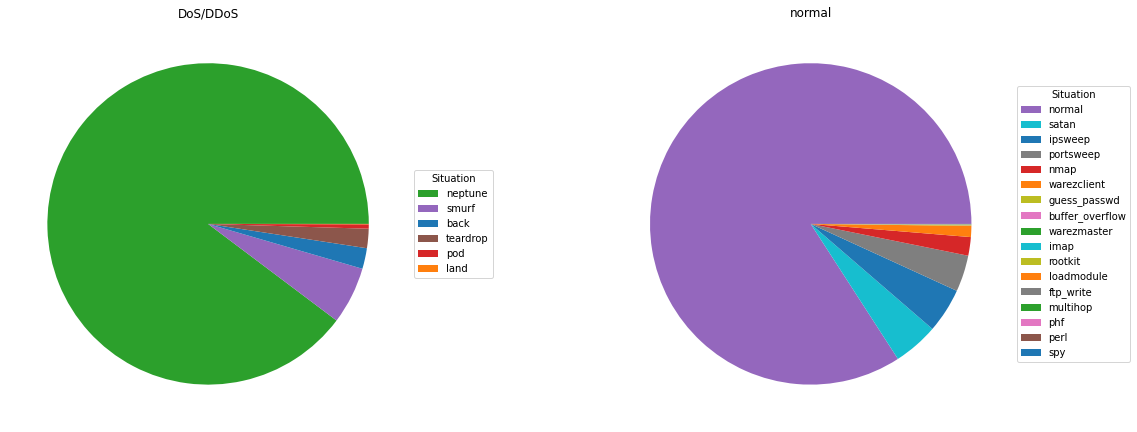

In [105]:
normal_class = df.loc[df.attack_class == 0].attack.value_counts()
DoSDDoS_class = df.loc[df.attack_class == 1].attack.value_counts()

lag_axs = bake_pies([DoSDDoS_class , normal_class], ['DoS/DDoS','normal'])        
plt.show()

*J'ai ajouté 16 types d'attaques différentes dans la classe  attaques normales.* 

*Je constate que dans le graphique ciculaires il y en que 6 de ces attaques dans l'ensemble des données que je vais utiliser*

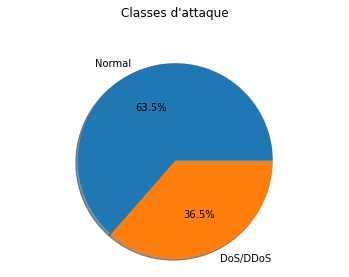

In [106]:
# Répartition de la classes d'attaque en général

Normal = (df.attack_class == 0).sum()
DoSDDoS = (df.attack_class == 1).sum()

myData = [Normal , DoSDDoS]

my_labels = 'Normal','DoS/DDoS' 
plt.pie(myData,labels=my_labels ,autopct='%1.1f%%' , shadow = True)
plt.title("Classes d'attaque\n\n")
plt.axis('equal')
plt.show()

*Comme montre le graphique circulaire, les attaques DoS/DDoS ont un taux de 36.5% dans notre jeux de données.*

In [107]:
# Choix de la comme variable cible 'attack_class = 1' c'est-à-dire les attaques DoS/DDoS.

attack_vs_protocol = pd.crosstab((df.attack_class == 1), df.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack_class,,,
False,5444,60500,14101
True,2847,42188,892


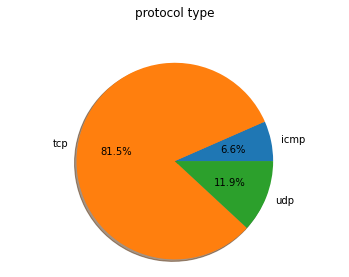

In [108]:
icmp = attack_vs_protocol.icmp.sum()
tcp = attack_vs_protocol.tcp.sum()
udp = attack_vs_protocol.udp.sum()
myData = [icmp , tcp,udp]
my_labels = 'icmp','tcp' ,'udp' 
plt.pie(myData,labels=my_labels ,autopct='%1.1f%%' , shadow = True)
plt.title('protocol type\n\n')
plt.axis('equal')
plt.show()

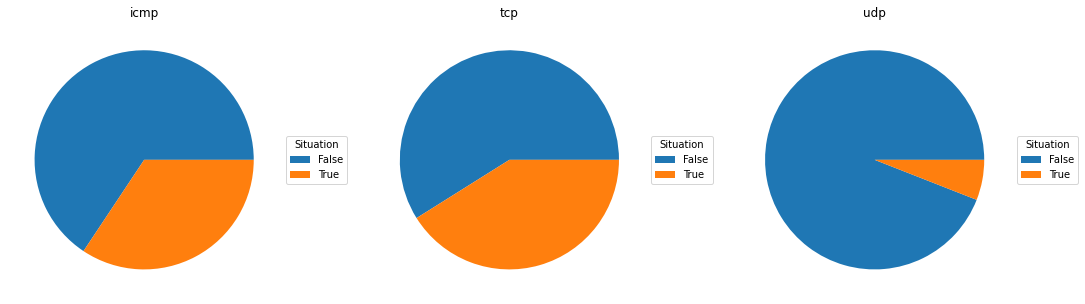

In [109]:
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp


bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'])
plt.show()

*Dans les graphiques et tableaux ci-dessus, nous voyons la répartition des types de protocoles dans les attaques DDoS dans nos données.*

---
*Il existe plusieurs types d'attaques DDoS.*

1.   *Attaque DDoS basée sur le volume : par manipulation des paquets UDP et SYN*
2.   *Attaque DDoS basée sur le protocole : avec des vulnérabilités sur les paquets TCP/IP et OSI* 
3.   *Attaque DDoS par inondation*
* *Attaque DDoS Ping Flood : via le protocole ICMP*
* *Attaque DDoS SYN Flood : avec manipulation TCP/IP*
* *UDP Flood se présente sous la forme d'une attaque DDoS.*

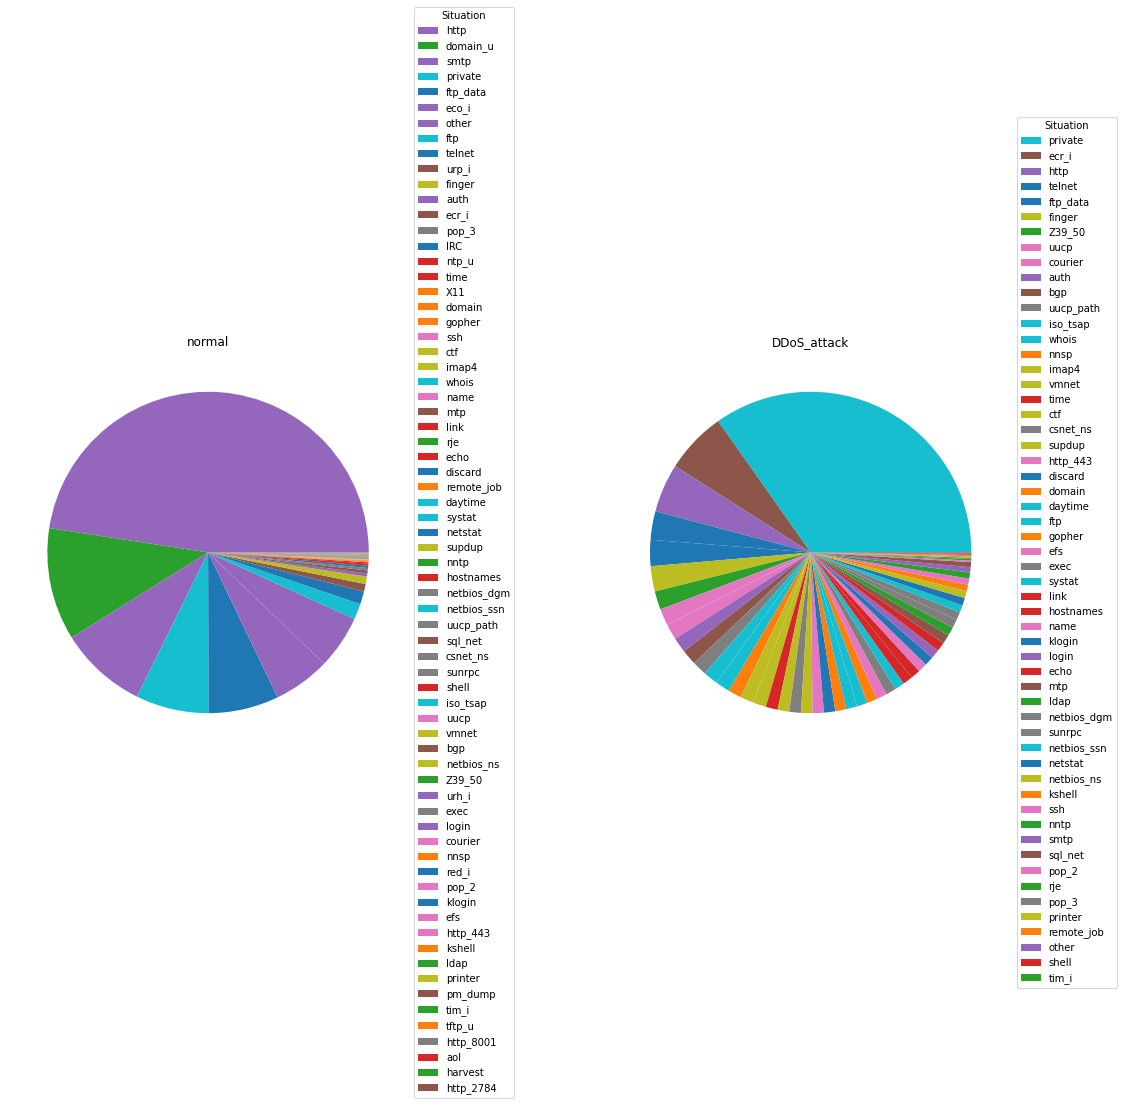

In [110]:
normal_services = df.loc[df.attack_class == 0].service.value_counts()
DDoS_attack_services = df.loc[df.attack_class == 1].service.value_counts()

service_axs = bake_pies([normal_services, DDoS_attack_services], ['normal','DDoS_attack'])        
plt.show()

In [111]:
service_vs_protocol = pd.crosstab(df.service, df.protocol_type,)
service_vs_protocol

protocol_type,icmp,tcp,udp
service,,,
IRC,0,187,0
X11,0,73,0
Z39_50,0,862,0
aol,0,2,0
auth,0,955,0
...,...,...,...
urp_i,602,0,0
uucp,0,780,0
uucp_path,0,689,0


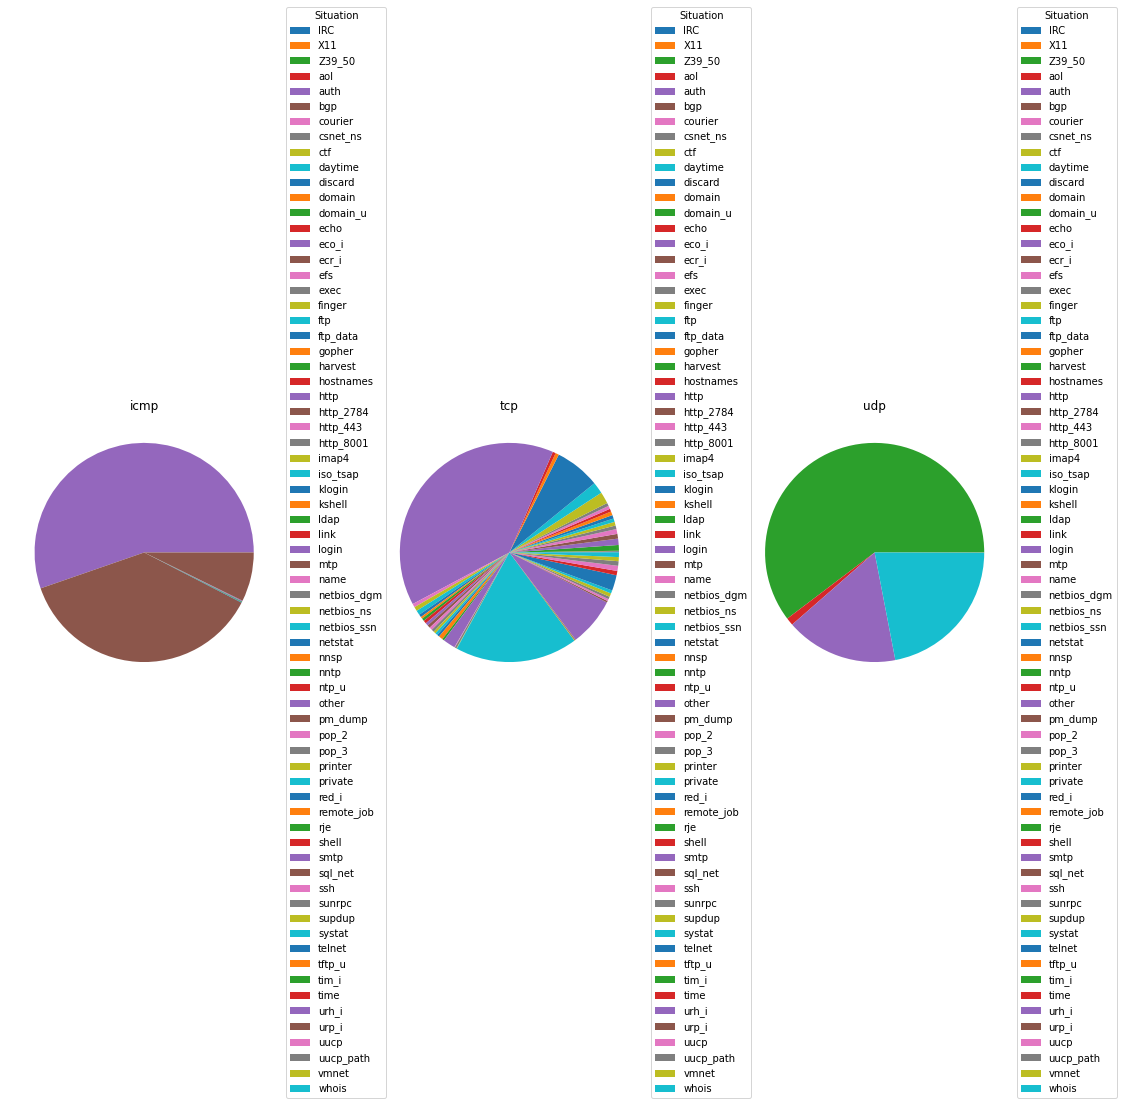

In [112]:
icmp_service = service_vs_protocol.icmp
tcp_service = service_vs_protocol.tcp
udp_service = service_vs_protocol.udp

# Création des graphiques
bake_pies([icmp_service, tcp_service, udp_service],['icmp','tcp','udp'])
plt.show()

# 3  Encodage des données

*Je vais effacer les données des variables catérogielles à l'aide de l'encodeurs d'étiquettes.*

In [113]:
df = pd.get_dummies(df,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [114]:
test_df = pd.get_dummies(test_df,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

*J'ai remplacé les variables catégorielles par des valeurs entières. Regardons maintenant notre jeu de données tel qu'il est.*

In [115]:
df.head() 

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [116]:
test_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,267,14515,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [117]:
# Suppression de la colonne 'attack' dans les deux jeux de données
drop_cols = ['attack']  
df.drop(drop_cols, axis=1, inplace=True)  

In [118]:
drop_cols = ['attack' ]  
test_df.drop(drop_cols, axis=1, inplace=True)  

In [119]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Columns: 125 entries, duration to SH
dtypes: float64(15), int64(26), uint8(84)
memory usage: 49.5 MB


In [120]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Columns: 119 entries, duration to SH
dtypes: float64(15), int64(26), uint8(78)
memory usage: 8.7 MB


*Il n'y a plus de variable catégorielle dans les deux jeux de données.*

#4 Séléction des features

In [121]:
normal = df[df.attack_class == 0]
DDoS = df[df.attack_class == 1]
total_data = pd.concat([normal, DDoS], ignore_index=True)
total_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,287,2251,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,334,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [122]:
normal_test= test_df[test_df.attack_class == 0]
DDoS_test= test_df[test_df.attack_class == 1 ]
total_data_test = pd.concat([normal_test, DDoS_test], ignore_index=True)
total_data_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,267,14515,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1022,387,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
22539,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
22540,1,2599,293,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
22541,0,1032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [123]:
corr= total_data.corr()
corr_y = abs(corr['attack_class'])
highest_corr = corr_y[corr_y > 0.1]
highest_corr.sort_values(ascending=True)

uucp                           0.101893
Z39_50                         0.107382
wrong_fragment                 0.118139
other                          0.138173
eco_i                          0.147231
smtp                           0.171048
ecr_i                          0.184002
tcp                            0.201822
dst_host_srv_diff_host_rate    0.207906
domain_u                       0.210650
udp                            0.232981
dst_host_same_src_port_rate    0.242410
srv_diff_host_rate             0.268219
private                        0.348617
http                           0.440163
dst_host_count                 0.476837
logged_in                      0.580721
dst_host_srv_count             0.609863
count                          0.621690
dst_host_same_srv_rate         0.671210
SF                             0.763463
srv_serror_rate                0.786565
serror_rate                    0.787253
dst_host_serror_rate           0.789292
dst_host_srv_serror_rate       0.791938


In [124]:
corr= total_data_test.corr()
corr_y = abs(corr['attack_class'])
highest_corr_test = corr_y[corr_y >0.1]
highest_corr_test.sort_values(ascending=True)

telnet                         0.100577
num_failed_logins              0.101263
dst_host_same_src_port_rate    0.101926
ftp_data                       0.109109
ftp                            0.109838
is_guest_login                 0.120301
diff_srv_rate                  0.125131
tcp                            0.125809
other                          0.134187
dst_host_srv_diff_host_rate    0.140475
domain_u                       0.142900
S3                             0.143072
pop_3                          0.148922
icmp                           0.161969
duration                       0.170631
RSTR                           0.173693
ecr_i                          0.237398
srv_diff_host_rate             0.239537
udp                            0.250946
http                           0.281649
private                        0.305931
dst_host_srv_count             0.353419
S0                             0.366611
count                          0.369816
REJ                            0.372424


In [125]:
highest_corr_columns= highest_corr.index

In [126]:
highest_corr_test_columns= highest_corr_test.index

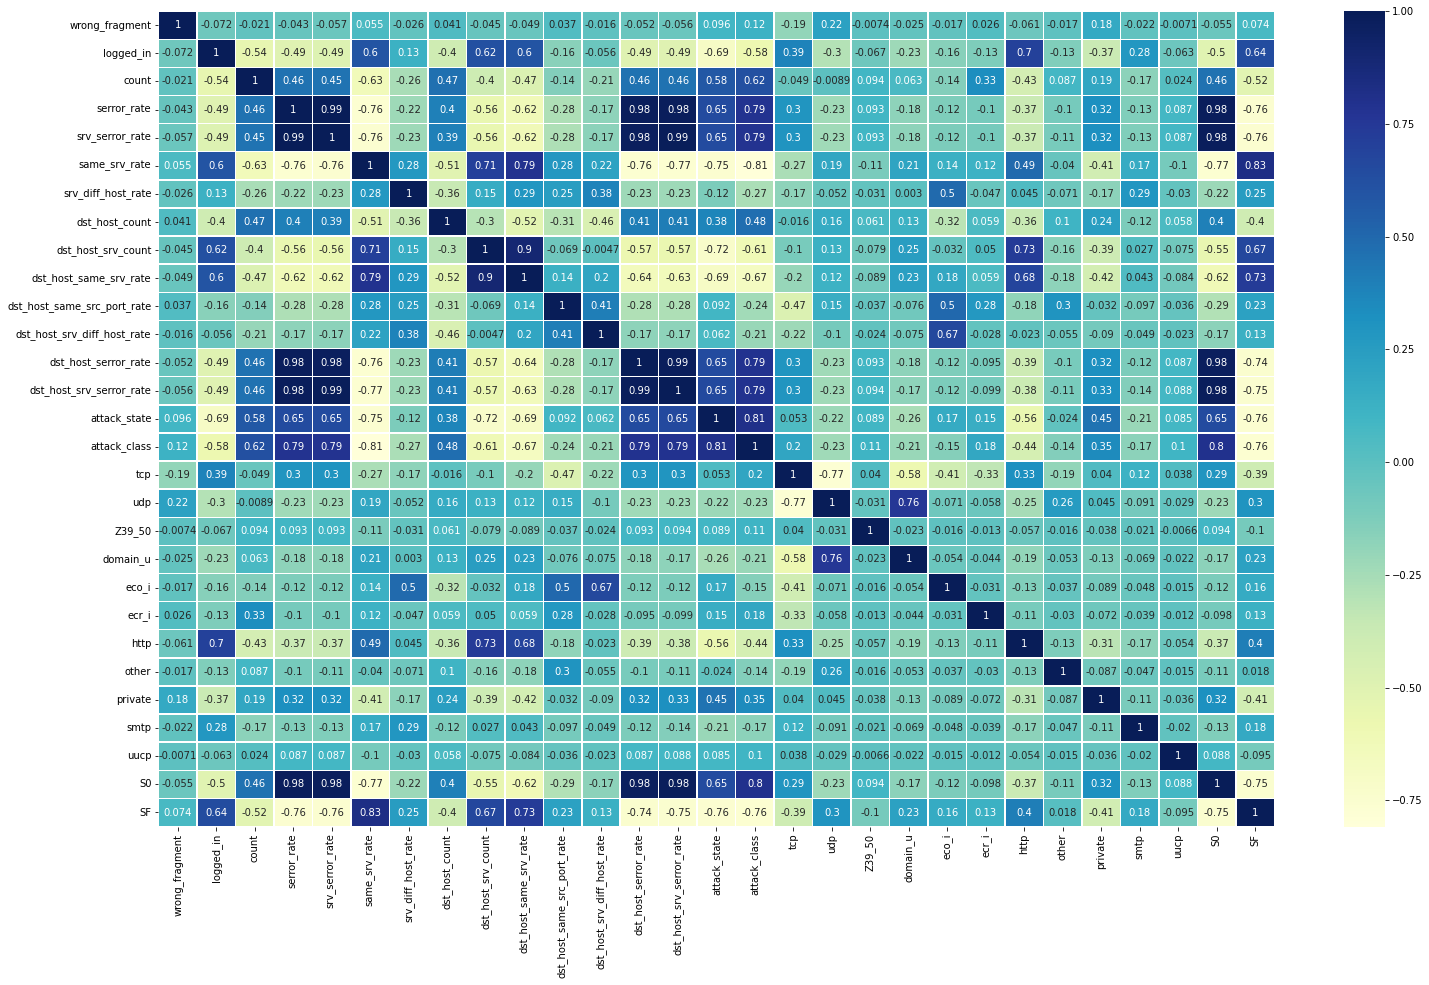

In [161]:
plt.figure(figsize=(25,15))
g=sns.heatmap(total_data[highest_corr.index].corr(),annot=True,cmap="YlGnBu",linewidths=.5)

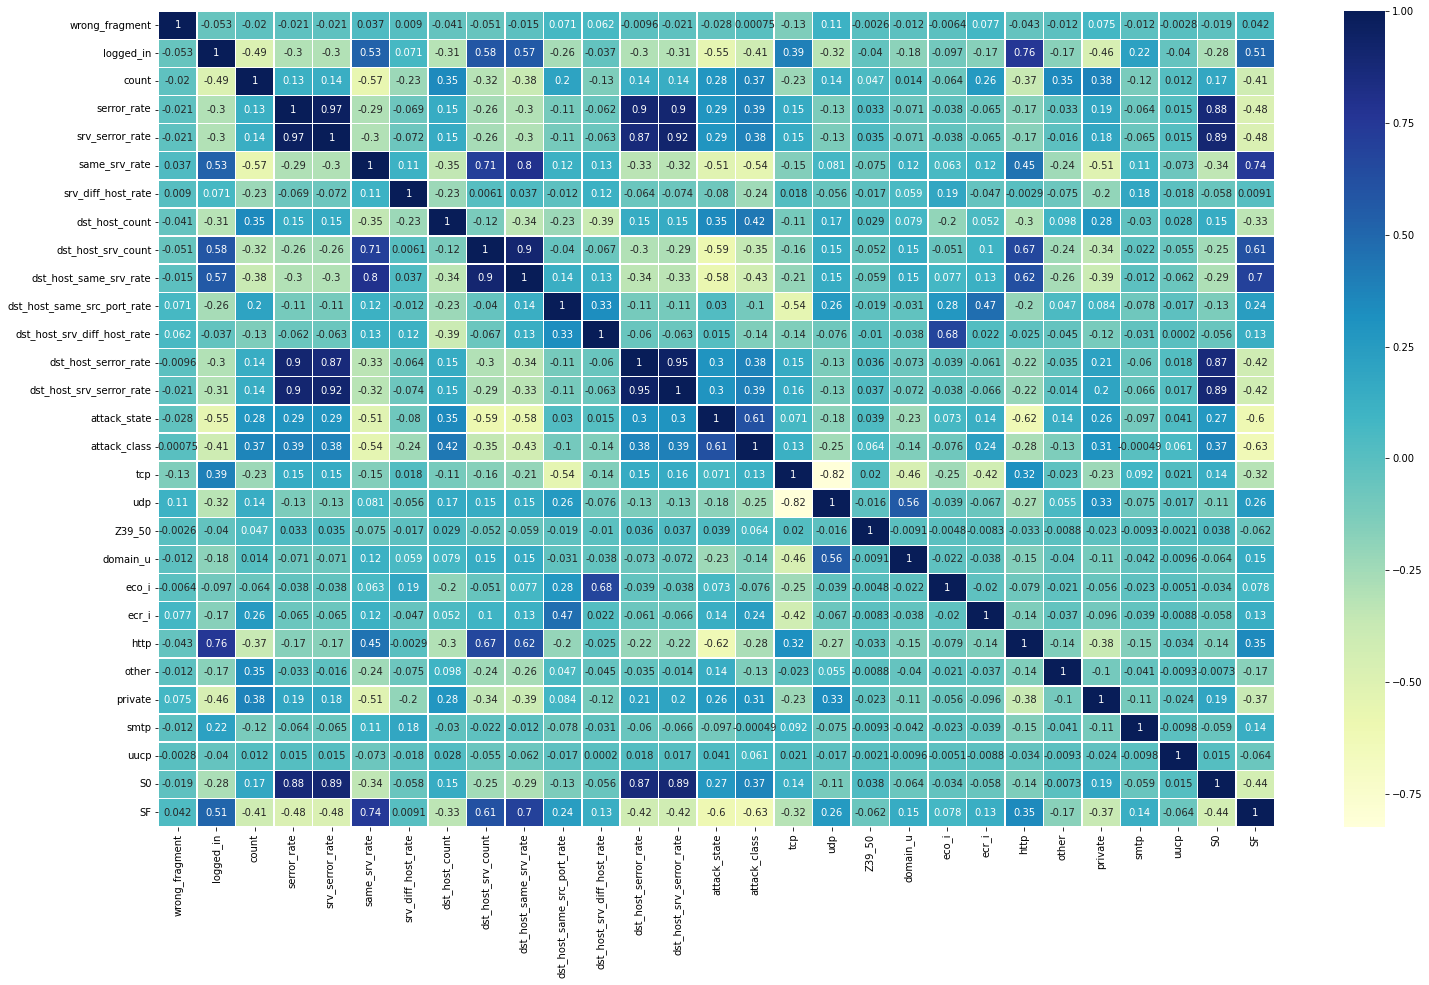

In [163]:
plt.figure(figsize=(25,15))
g=sns.heatmap(total_data_test[highest_corr.index].corr(),annot=True,cmap="YlGnBu",linewidths=.5)

*J'affiche les attributs les plus associés aux attaques DDoS dans la mtrice de corrélation et la carte thermique.*

*J'entraîne notre ensemble de données en supprimants les attributs autres que ces attributs.*

In [164]:
# Je supprime les colonnes dont je n'es pas l'utilité.
drop_cols = df.loc[:,[i for i in list(df.columns) if i not in [
'diff_srv_rate',                
'dst_host_same_src_port_rate', 
'REJ',
'tcp',                            
'ecr_i',                         
'rerror_rate',                    
'srv_rerror_rate',                
'dst_host_srv_rerror_rate',       
'dst_host_rerror_rate',           
'smtp',                           
'dst_host_srv_diff_host_rate',    
'domain_u',                       
'udp',                            
'srv_diff_host_rate',             
'private',                        
'dst_host_count',                 
'http',                           
'logged_in',                      
'count',
'dst_host_srv_count',             
'dst_host_same_srv_rate',         
'serror_rate',                    
'srv_serror_rate',                
'dst_host_serror_rate',           
'S0',                             
'dst_host_srv_serror_rate',       
'SF',                             
'same_srv_rate',                 
'attack_state',                  
'attack_class', 
'other',
'icmp',                         
'wrong_fragment',               
'dst_host_diff_srv_rate',   
'RSTO',
'ftp_data',
'Z39_50',
'uucp'                          
]]]

In [165]:
df.drop(drop_cols, axis=1, inplace=True)  
df

,wrong_fragment,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_state
0,0,0,13,0.0,0.0,0.0,0.0,0.08,0.15,0.00,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
1,0,0,123,1.0,1.0,0.0,0.0,0.05,0.07,0.00,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
2,0,1,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
3,0,1,30,0.0,0.0,0.0,0.0,1.00,0.00,0.09,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,0,0,121,0.0,0.0,1.0,1.0,0.16,0.06,0.00,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,184,1.0,1.0,0.0,0.0,0.14,0.06,0.00,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1
125968,0,0,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0
125969,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0
125970,0,0,144,1.0,1.0,0.0,0.0,0.06,0.05,0.00,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1


In [166]:
drop_cols1 = test_df.loc[:,[i for i in list(test_df.columns) if i not in [
'diff_srv_rate',                
'dst_host_same_src_port_rate', 
'REJ',
'tcp',                            
'ecr_i',                         
'rerror_rate',                    
'srv_rerror_rate',                
'dst_host_srv_rerror_rate',       
'dst_host_rerror_rate',           
'smtp',                           
'dst_host_srv_diff_host_rate',    
'domain_u',                       
'udp',                            
'srv_diff_host_rate',             
'private',                        
'dst_host_count',                 
'http',                           
'logged_in',                      
'count',                          
'dst_host_srv_count',             
'dst_host_same_srv_rate',         
'serror_rate',                    
'srv_serror_rate',                
'dst_host_serror_rate',           
'S0',                             
'dst_host_srv_serror_rate',       
'SF',                             
'same_srv_rate',                 
'attack_state',                 
'attack_class', 
'other',
'icmp',                         
'wrong_fragment',               
'dst_host_diff_srv_rate',   
'RSTO',
'ftp_data',
'Z39_50',
'uucp'
]]]

In [167]:
test_df.drop(drop_cols1, axis=1, inplace=True)  
test_df

,wrong_fragment,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_state
0,0,0,136,0.0,0.00,1.0,1.0,0.01,0.06,0.00,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
1,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0
2,0,0,1,0.0,0.00,0.0,0.0,1.00,0.00,1.00,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1
3,0,0,1,0.0,0.12,1.0,0.5,1.00,0.00,0.75,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1
4,0,1,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0
22539,0,1,2,0.0,0.00,0.0,0.0,1.00,0.00,0.18,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0
22540,0,1,5,0.0,0.00,0.0,0.0,1.00,0.00,0.20,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1
22541,0,0,4,0.0,0.00,0.0,0.0,1.00,0.00,0.33,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0


In [168]:
data = df.copy()

In [169]:
test_data = test_df.copy()